<a href="https://colab.research.google.com/github/saakeeth/c-/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
ds=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Advertising.csv')

In [ ]:
ds.describe

<bound method NDFrame.describe of      Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>

In [ ]:
ds.info

<bound method DataFrame.info of      Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>

In [ ]:
ds.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

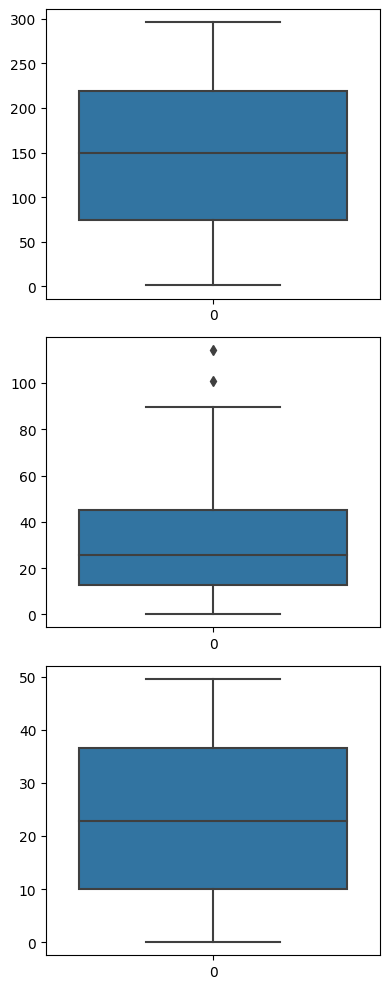

In [ ]:
fig, axs = plt.subplots(3,figsize=(4,10))
p1=sns.boxplot(ds['TV'],ax=axs[0])
p1=sns.boxplot(ds['Newspaper'],ax=axs[1])
p1=sns.boxplot(ds['Radio'],ax=axs[2])
plt.tight_layout()
#The plt.tight_layout() function in matplotlib is used to automatically adjust the spacing between subplots to avoid overlapping elements

<Axes: xlabel='Newspaper', ylabel='Count'>

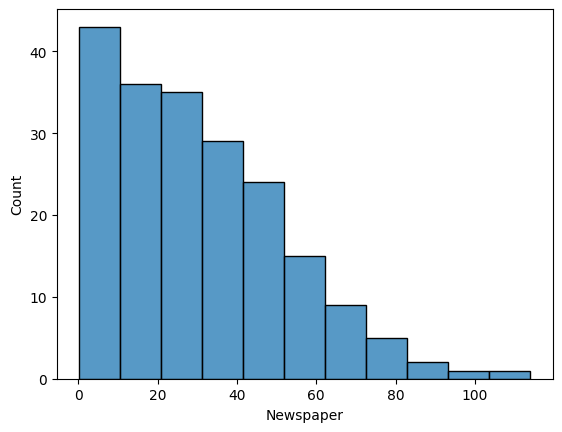

In [ ]:
sns.histplot(ds['Newspaper'])

In [ ]:
#inter Quartile range
#The interquartile range is a measure of statistical dispersion, representing the range between the 75th percentile (upper quartile) and the 25th percentile (lower quartile) of a dataset.
#It provides information about the spread or variability of the data within the middle 50% of the distribution.
xt=ds.Newspaper.quantile(0.75)-ds.Newspaper.quantile(0.25)

In [ ]:
#Aplying the 1.5 times IQR rule
lower=ds['Newspaper'].quantile(0.25)-(xt*1.5)
upper=ds['Newspaper'].quantile(0.75)+(xt*1.5)
print(lower)
print(upper)

-35.775000000000006
93.625


In [ ]:
df=ds.copy()

In [ ]:
df.loc[df['Newspaper']>=93,'Newspaper']=93

<Axes: >

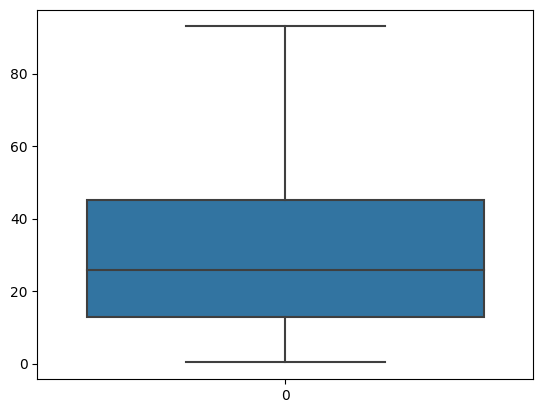

In [ ]:
sns.boxplot(df['Newspaper'])

<Axes: >

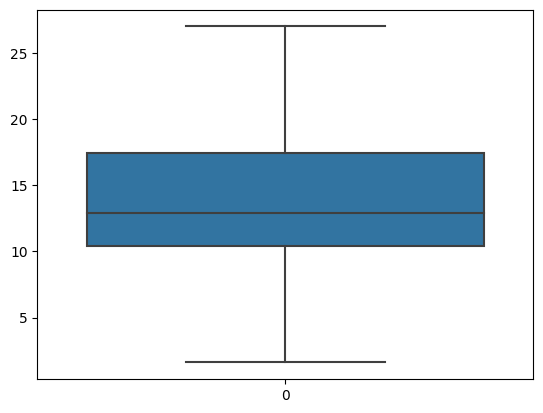

In [ ]:
sns.boxplot(df['Sales'])

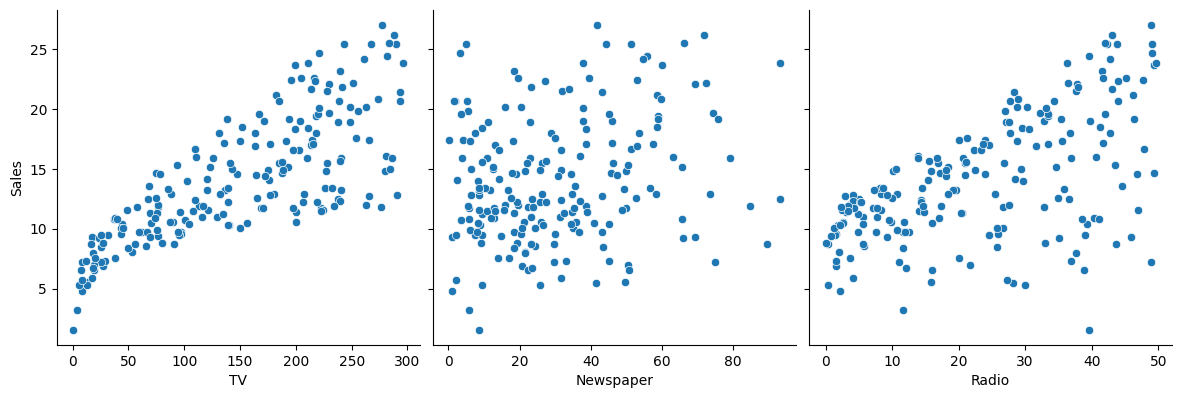

In [ ]:
sns.pairplot(df,x_vars=['TV','Newspaper','Radio'],y_vars='Sales',height=4,aspect=1,kind='scatter')

<Axes: >

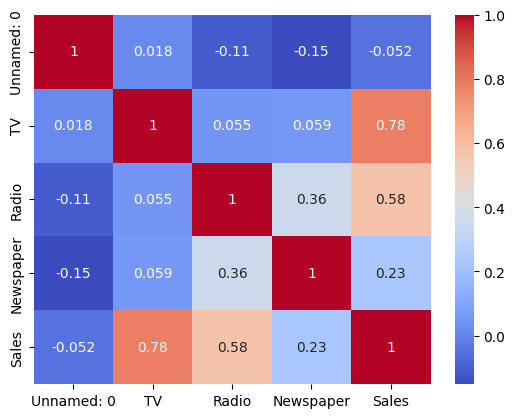

In [ ]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [ ]:
#selecting the important features
imp_features=list(ds.corr()['Sales'][(ds.corr()['Sales']>+0.5)|(ds.corr()['Sales']<-0.5)].index)


In [ ]:
print(imp_features)

['TV', 'Radio', 'Sales']


In [ ]:
x=df['TV']
y=df['Sales']

In [ ]:
# two-dimensional array with a single column
x=x.values.reshape(-1,1)
x

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [ ]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [ ]:
print(x.shape,y.shape)

(200, 1) (200,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.30)

In [ ]:
print(x_train.shape,y_train.shape)

(140, 1) (140,)


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model=KNeighborsRegressor().fit(x_train,y_train)
model

KNeighborsRegressor()

In [ ]:
model_train_predict=model.predict(x_train)
model_test_predict=model.predict(x_test)
print(model_train_predict,model_test_predict)

[14.92  7.52 17.02 16.32 19.06  9.62 19.56  5.28 19.46 16.52  9.64 11.6
  8.64 13.52 14.64  8.4  16.12 10.28 13.76 17.18 16.04 17.52 14.66 12.2
 19.66 17.64 10.44 16.32 10.   20.8  11.44 12.2  13.52 16.9  16.06 16.66
 14.54 16.12 18.76 13.64 13.64 15.62 20.82 15.12 17.52 16.22 17.52 11.44
  8.18 16.66 16.9  20.82 16.9  14.64 14.36 19.74 15.28 16.12 10.44 12.2
 20.34 12.2  11.66 19.74 16.06 16.06 19.42 12.2  10.28 17.02 19.14 19.74
 11.42  6.96  7.52 17.18 14.64  6.42 19.42 11.44 20.14 10.16 16.06  6.42
 15.28 17.8  18.82 15.36  8.2   6.42 11.6  13.52 16.32 11.6  17.28 16.94
 13.18  7.52 16.06  5.28  8.64 18.48 14.36 14.66 13.52 19.42 15.12  9.58
 16.32 14.82 13.2   8.4  17.18 10.44 19.34 13.18  6.42 20.36 21.3  19.06
 19.66 16.52 20.8  13.76 13.18  8.64  7.52 19.74  7.52 14.34 20.82 16.12
 13.18 19.66 19.14 14.54  8.64  9.62 11.42  9.58] [13.18  7.52 15.12 13.6   9.58 16.9   9.28 14.64 14.64 19.76 13.76  5.28
 19.14 13.64  9.28 16.9  18.48 12.06 16.52 11.6  18.34 16.56  9.58 11.94
  7.

In [ ]:
results=pd.DataFrame(columns=['Model','train R2','Test R2','Test RMSE','Variance'])

In [ ]:
r2 = r2_score(y_test,model_test_predict)
r2_train=r2_score(y_train,model_train_predict)
rmse=np.sqrt(mean_squared_error(y_test,model_test_predict))
variance=r2_train-r2
results=results.append({'Model':'K-Nearest Neighbors','Train R2':r2_train,'Test R2':r2,'Test RMSE':rmse,'Variance':variance},ignore_index=True)
print('R2:',r2)
print("RMSE:",rmse)

R2: 0.5649744035588302
RMSE: 3.374570589966472


<ipython-input-41-098f2952f8b2>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({'Model':'K-Nearest Neighbors','Train R2':r2_train,'Test R2':r2,'Test RMSE':rmse,'Variance':variance},ignore_index=True)


In [ ]:
results.head()

,Model,train R2,Test R2,Test RMSE,Variance,Train R2
0,K-Nearest Neighbors,NaN,0.564974,3.374571,0.08222,0.647195


In [ ]:
# Support Vector Regression (SVR) model using the scikit-learn library
svr=SVR().fit(x_train,y_train)
svr

SVR()

In [ ]:
svr_train_predict=svr.predict(x_train)
svr_test_predict=svr.predict(x_test)

In [ ]:
print(svr_train_predict,svr_test_predict)

[14.85729835  7.92779523 16.94465801 14.70964113 17.51938784  9.32063092
 17.30054079  7.59861128 17.62414001 18.00620744  9.62067689 11.848828
  8.17435287 12.38730573 13.43485765  8.30086446 16.58532391 10.34839714
 13.93938527 15.76804649 16.72528169 17.53187269 15.22087239 10.90642721
 17.2445583  15.93056398 10.44416927 14.59060845  9.0227552  17.45173416
 11.44828036 10.84308004 12.38730573 17.83025863 18.04849159 16.85136762
 13.29331788 16.53789327 17.12385795 13.1069154  13.19362348 14.01668173
 17.20827875 17.75771603 17.60064158 17.94783328 17.60064158 11.59543566
  8.22375052 16.80639444 17.83522323 17.33700994 17.74358567 13.49114156
 15.32601779 18.14312597 14.77256903 16.58532391 10.52231075 10.8218134
 17.449087   10.91167503 10.59972994 18.14516559 18.05155046 18.05155046
 16.25760278 10.86427177 10.13137996 16.93980616 18.09060533 18.14656383
 11.10741111  7.76962749  7.87868362 15.6389518  13.48709668  7.66641768
 18.03420692 11.49947382 18.13596402  9.10591061 18.04

In [ ]:
r2=r2_score(y_test,svr_test_predict)
r2_train = r2_score(y_train,svr_train_predict)
rmse=np.sqrt(mean_squared_error(y_test,svr_test_predict))
variance=r2_train-r2
results=results.append({'Model':'Support Vector Machine','Train R2':r2_train,'Test R2':r2,'Test RMSE':rmse,'Variance':variance},ignore_index=True)
print('R2:',r2)
print("RMSE:",rmse)

R2: 0.6118882717956817
RMSE: 3.1874214800837475


<ipython-input-47-e8d7cac54ec7>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({'Model':'Support Vector Machine','Train R2':r2_train,'Test R2':r2,'Test RMSE':rmse,'Variance':variance},ignore_index=True)


In [ ]:
results.head()

,Model,Test R2,Test RMSE,Variance,Train R2
0,K-Nearest Neighbors,0.564974,3.374571,0.082220,0.647195
1,Support Vector Machine,0.611888,3.187421,-0.036513,0.575375


In [ ]:
import statsmodels.api as sm

In [ ]:
x_train_constant=sm.add_constant(x_train)

In [ ]:
model=sm.OLS(y_train,x_train_constant).fit()

In [ ]:
model.params

const    7.254899
x1       0.046737
dtype: float64

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     199.2
Date:                Tue, 27 Jun 2023   Prob (F-statistic):           1.48e-28
Time:                        06:27:02   Log-Likelihood:                -367.21
No. Observations:                 140   AIC:                             738.4
Df Residuals:                     138   BIC:                             744.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.2549      0.576     12.589      0.0

In [ ]:
print(model.summary)

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x7fa3165481f0>>


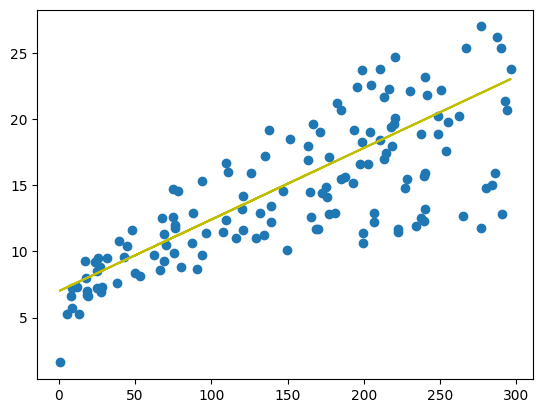

In [ ]:
plt.scatter(x_train,y_train)
plt.plot(x_train,6.9955+0.0541*x_train,'y')
plt.show()

In [ ]:
y_train_predict=model.predict(x_train_constant)
result=(y_train-y_train_predict)
result

173   -3.425484
121   -1.133563
43    -4.024875
179   -2.394619
183    5.503414
         ...   
99     3.626199
44     0.071991
170   -1.191771
114    3.690233
190    1.698972
Name: Sales, Length: 140, dtype: float64

In [ ]:
y_train_predict

array([15.12548376,  8.13356313, 16.9248751 , 14.99461894, 20.6965863 ,
        9.51231753, 17.28942711,  7.28761551, 20.54235276, 18.35036694,
        9.7553522 , 11.75104078,  8.4513777 , 12.38666993, 13.69999192,
        8.59159001, 16.5930393 , 10.34424391, 14.25616743, 15.89665148,
       16.71923038, 17.56050425, 15.43862459, 10.82096578, 17.22866845,
       16.03219005, 10.42369756, 14.88712283,  9.26460911, 17.46235563,
       11.33040384, 10.76488085, 12.38666993, 20.19649572, 18.46721054,
       16.83607397, 13.53173715, 16.5509756 , 17.10247736, 13.3027237 ,
       13.41021981, 14.33562107, 21.10787575, 17.87364508, 17.64930538,
       18.21482837, 17.64930538, 11.47996364,  8.50746262, 16.79401028,
       20.18714823, 20.94429472, 20.35072926, 13.76542433, 15.52742572,
       19.19164082, 15.05070386, 16.5930393 , 10.48912997, 10.74618588,
       20.79473492, 10.82563952, 10.55456238, 18.98132235, 18.47655802,
       18.47655802, 16.30794093, 10.78357583, 10.16664165, 16.92

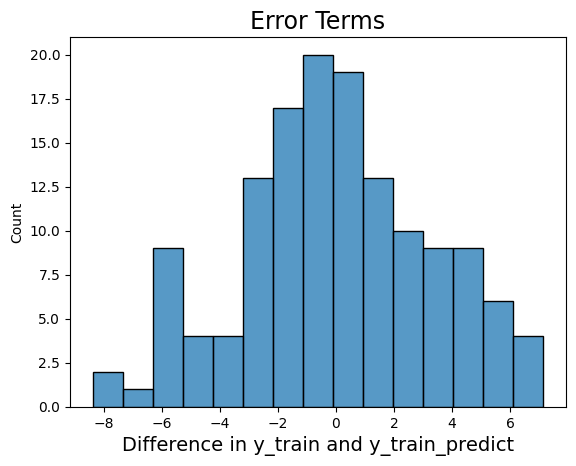

In [ ]:
fig, ax = plt.subplots()
sns.histplot(result, bins=15, ax=ax)
ax.set_title('Error Terms', fontsize=17)
ax.set_xlabel('Difference in y_train and y_train_predict', fontsize=14)
plt.show()

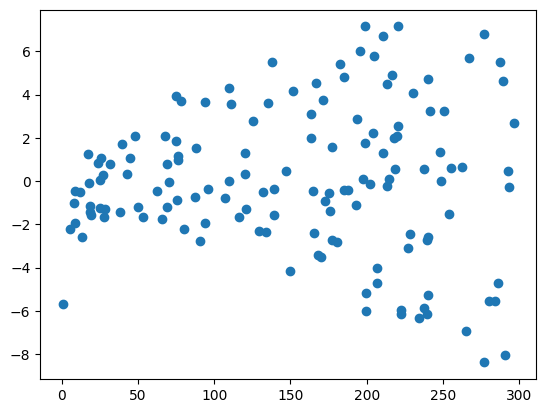

In [ ]:
plt.scatter(x_train,result)
plt.show()

In [ ]:
x_test_constant = sm.add_constant(x_test)
y_predict=model.predict(x_test_constant)
y_predict

array([13.00827785,  8.05878323, 17.80821267, 12.14363526,  9.03092192,
       20.40681419,  9.94230195, 13.77477182, 13.81216177, 17.36888076,
       14.25149368,  7.4465228 , 19.4673917 , 13.38217735,  9.88154328,
       20.37409798, 16.49021693, 11.94733802, 18.38775689, 11.72767206,
       20.04693592, 17.72408528,  8.97951074, 10.68542721,  8.17095308,
        9.26928285, 17.98114119,  7.59608259,  7.65684126, 10.45174002,
       10.77422834, 12.73252697, 11.79777822,  7.87183348,  9.34406275,
       14.573982  , 18.62144408, 16.18642359, 10.04045057, 10.82563952,
       12.53155599, 13.62053828, 10.38163386, 16.03686379, 13.93367911,
       17.91103503, 19.66836268, 20.50963655, 13.85889921, 11.44724744,
       11.81179945, 18.10265852, 11.26029769, 17.46702938, 17.05106618,
       17.32214332, 16.06023251, 19.5421716 ,  8.04476199, 12.05483412])

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
np.sqrt(mean_squared_error(y_test,y_predict))

3.027814535803027

In [ ]:
r2=r2_score(y_test,y_predict)
r2

0.6497837319307488

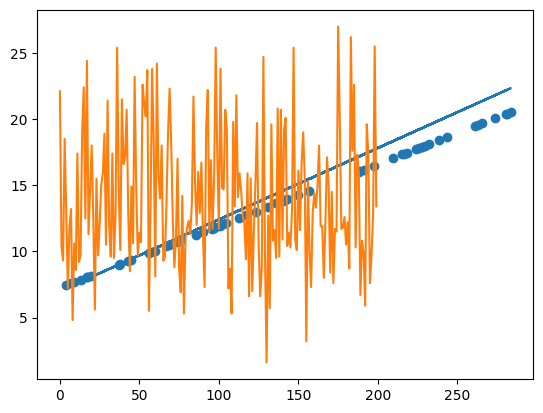

In [ ]:
plt.scatter(x_test,y_predict)
plt.plot(x_test,6.9955+0.0541*x_test,y)
plt.show()